In this demo, we train a 1-hiddel layer fully-connected network on MNIST for 10 epochs using the Burstprop learning rule with updating feedback weights, and observe the weight alignment before and after training.

## Import dependencies

In [28]:
import os
import math

import torch
import torch.nn.functional as F

import matplotlib.pyplot as plt

## Setting the hyperparameters

In [29]:
directory = "./Demo"

n_epochs = 10             # Train for 10 epochs
batch_size = 32           # Set the batch size
n_hidden_layers = 1       # Use one hidden layer
weight_decay = 1e-4       # Set weight decay
momentum = 0.9            # Set momentum
hidden_lr = 1.0           # Set the learning rate for the hidden layer
output_lr = 0.01          # Set the learning rate for the output layer
weight_fa_learning = True # Use the Kolen-Pollack learning rule for feedback weights
weight_fa_std = 0.5       # Set standard deviation for initialization of feedback weights

## Running the training script

We'll use Jupyter's magic %run command to run the main script:

In [30]:
%run train_mnist.py {directory} -momentum {momentum} -n_epochs {n_epochs} -weight_decay {weight_decay} -n_hidden_layers {n_hidden_layers} -hidden_lr {hidden_lr} -output_lr {output_lr} -weight_fa_std {weight_fa_std} -batch_size {batch_size} -weight_fa_learning {weight_fa_learning} -validation True

Test Loss: 0.379 | Acc: 8.450% (845/10000): 100%|██████████| 100/100 [00:03<00:00, 32.68it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Epoch 1.


Train Loss: 0.080 | Acc: 43.234% (21617/50000): 100%|██████████| 1563/1563 [00:57<00:00, 26.99it/s]
Test Loss: 0.046 | Acc: 65.370% (6537/10000): 100%|██████████| 100/100 [00:02<00:00, 39.97it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Epoch 2.


Train Loss: 0.038 | Acc: 73.152% (36576/50000): 100%|██████████| 1563/1563 [01:02<00:00, 25.10it/s]
Test Loss: 0.031 | Acc: 80.800% (8080/10000): 100%|██████████| 100/100 [00:02<00:00, 42.62it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Epoch 3.


Train Loss: 0.025 | Acc: 87.056% (43528/50000): 100%|██████████| 1563/1563 [00:58<00:00, 26.69it/s]
Test Loss: 0.021 | Acc: 89.870% (8987/10000): 100%|██████████| 100/100 [00:02<00:00, 40.79it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Epoch 4.


Train Loss: 0.020 | Acc: 90.350% (45175/50000): 100%|██████████| 1563/1563 [00:58<00:00, 26.63it/s]
Test Loss: 0.019 | Acc: 90.710% (9071/10000): 100%|██████████| 100/100 [00:02<00:00, 41.14it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Epoch 5.


Train Loss: 0.018 | Acc: 91.054% (45527/50000): 100%|██████████| 1563/1563 [00:59<00:00, 26.10it/s]
Test Loss: 0.018 | Acc: 91.160% (9116/10000): 100%|██████████| 100/100 [00:02<00:00, 38.71it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Epoch 6.


Train Loss: 0.018 | Acc: 91.384% (45692/50000): 100%|██████████| 1563/1563 [01:00<00:00, 25.76it/s]
Test Loss: 0.018 | Acc: 91.480% (9148/10000): 100%|██████████| 100/100 [00:02<00:00, 39.66it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Epoch 7.


Train Loss: 0.018 | Acc: 91.594% (45797/50000): 100%|██████████| 1563/1563 [00:59<00:00, 26.05it/s]
Test Loss: 0.018 | Acc: 91.660% (9166/10000): 100%|██████████| 100/100 [00:02<00:00, 39.74it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Epoch 8.


Train Loss: 0.018 | Acc: 91.670% (45835/50000): 100%|██████████| 1563/1563 [01:00<00:00, 26.03it/s]
Test Loss: 0.018 | Acc: 91.850% (9185/10000): 100%|██████████| 100/100 [00:02<00:00, 40.25it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Epoch 9.


Train Loss: 0.018 | Acc: 91.752% (45876/50000): 100%|██████████| 1563/1563 [01:02<00:00, 25.16it/s]
Test Loss: 0.018 | Acc: 91.760% (9176/10000): 100%|██████████| 100/100 [00:02<00:00, 42.38it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Epoch 10.


Train Loss: 0.018 | Acc: 91.752% (45876/50000): 100%|██████████| 1563/1563 [01:03<00:00, 24.77it/s]
Test Loss: 0.018 | Acc: 91.660% (9166/10000): 100%|██████████| 100/100 [00:02<00:00, 40.36it/s]


**Note:** The same can be done from the command line, by running:

```
python3 train_mnist.py ./Demo -momentum 0.9 -n_epochs 10 -weight_decay 1e-4 -n_hidden_layers 1 -hidden_lr 1.0 -output_lr 0.01 -weight_fa_std 0.1 -batch_size 32 -weight_fa_learning True -validation True
```

## Loading the model

In [31]:
net_pre = torch.load(os.path.join(directory, "initial_model.pth")) # Before training
net = torch.load(os.path.join(directory, "model.pth"))             # After 10 epochs

## Compare weight alignment before and after training

In [32]:
weight_fa_pre = net_pre.classification_layers[1].weight_fa
weight_pre = net_pre.classification_layers[1].weight

weight_fa = net.classification_layers[1].weight_fa
weight = net.classification_layers[1].weight

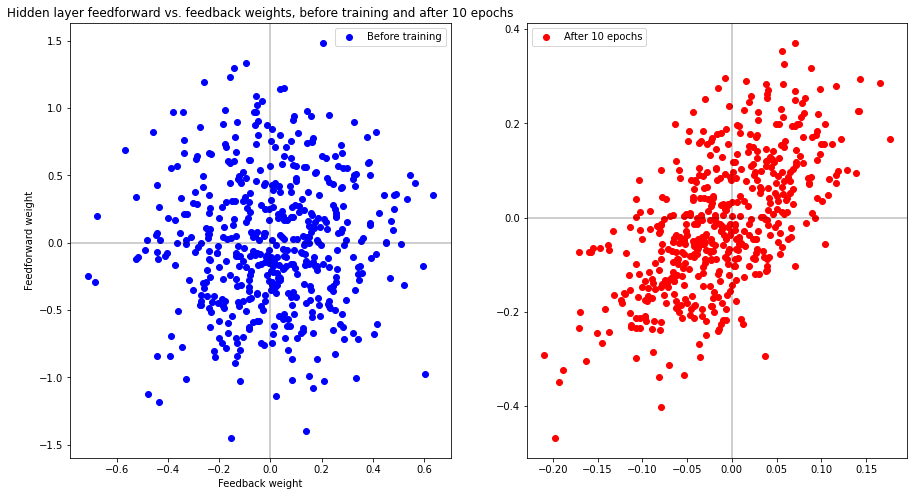

In [39]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
ax1.axhline(y=0, color='k', alpha=0.25)
ax1.axvline(x=0, color='k', alpha=0.25)
ax2.axhline(y=0, color='k', alpha=0.25)
ax2.axvline(x=0, color='k', alpha=0.25)
ax1.scatter(weight_pre.flatten()[:500], weight_fa_pre.flatten()[:500], c='b', label='Before training')
ax2.scatter(weight.flatten()[:500], weight_fa.flatten()[:500], c='r', label=f'After {n_epochs} epochs')
ax1.set_xlabel('Feedback weight')
ax1.set_ylabel('Feedforward weight')
ax1.set_title(f"Hidden layer feedforward vs. feedback weights, before training and after {n_epochs} epochs")
ax1.legend()
ax2.legend()
plt.show()

In [40]:
def weight_alignment(weight, weight_fa):
    """
    Given feedforward and feedback weights, compute the
    angle between the weight vectors.
    
    Arguments:
    weight: Feedforward weight tensor.
    weight_fa: Feedback weight tensor.
    
    Returns:
    Angle between the two weigh
    """
    
    return (180/math.pi)*torch.acos(F.cosine_similarity(weight.flatten(), weight_fa.flatten(), dim=0))

In [41]:
# Compare angles between weights pre- and post-training

print(f"Before training: {weight_alignment(weight_pre, weight_fa_pre)}")
print(f"After {n_epochs} epochs: {weight_alignment(weight, weight_fa)}")

Before training: 88.39533996582031
After 10 epochs: 46.94438171386719
